# IMPORT

In [1]:
pip install pyarabic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 1.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import regex as re
import html
import string
import unicodedata
import pyarabic.araby as araby
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


In [3]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from sklearn.feature_extraction.text import TfidfTransformer ,TfidfVectorizer

In [5]:
from sklearn.decomposition import TruncatedSVD

In [6]:
from sklearn.cluster import KMeans

# Way - 5 Steps

## 1) Data EDA

[More info Here](https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools)

In [50]:
data = pd.read_csv('/content/drive/MyDrive/NTI_datasets/text/data.csv')

In [51]:
data.columns

Index(['Unnamed: 0', 'ID', 'citizenComment'], dtype='object')

In [52]:
data.drop(['Unnamed: 0'], axis = 1, inplace= True)

In [53]:
data.rename(columns = {'citizenComment':'comment'}, inplace = True)

In [54]:
print("Shape of data=>",data.shape)

Shape of data=> (1000, 2)


In [55]:
data.isnull().sum()

ID         0
comment    0
dtype: int64

In [56]:
data['lenght'] = data['comment'].str.len()
#data['comment'].str.len().hist()

print('Length of a sample comment:', data['lenght'].min())
print('Length of a sample comment:', data['lenght'].max())
print('Length of a sample comment:', data['lenght'].mean())

Length of a sample comment: 10
Length of a sample comment: 1706
Length of a sample comment: 181.452


In [57]:
data['word_count'] = [len(i.split()) for i in data['comment']]
print('word_count of a sample comment:', data['word_count'].min())
print('word_count of a sample comment:', data['word_count'].max())
print('word_count of a sample comment:', data['word_count'].mean())

word_count of a sample comment: 2
word_count of a sample comment: 308
word_count of a sample comment: 32.924


<Axes: xlabel='word_count', ylabel='Count'>

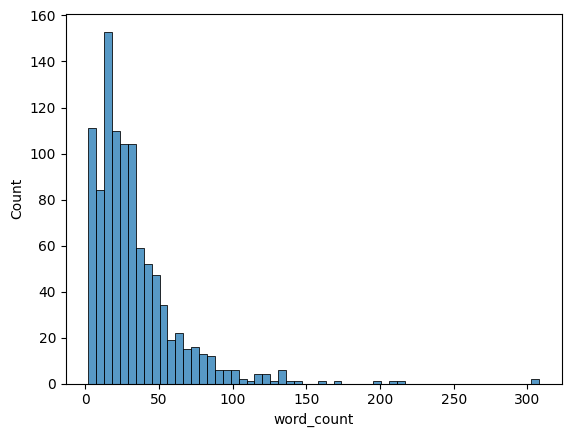

In [58]:
sns.histplot(data=data['word_count'])

In [59]:
len(data[data['word_count'] > 100])

30

<Axes: >

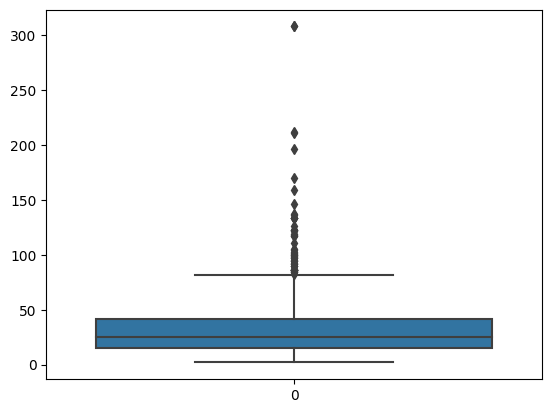

In [60]:
sns.boxplot(data=data['word_count'])

In [61]:
data["comment"].duplicated().sum()

35

## 2) Data preprocess

In [63]:
data['cleaned'] = data['comment'].apply(lambda x: Arabic_preprocess(x) )

In [64]:
AR_stopwords

'اذ اذا اذما اذن اف اقل اكثر الا الا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي الي اليك اليكم اليكما اليكن ام اما اما اما ان ان انا انا انت انتم انتما انتن انما انه اني اني اه اها او اولاء اولئك اوه اي اي ايها اي اين اين اينما ايه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلي بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمه حاشا حبذا حتي حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوي شتان عدا عسي عل علي عليك عليه عما عن عند غير فاذا فان فلا فمن في فيم فيما فيه فيها قد كان كانما كاي كاين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدي لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متي مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

In [65]:
data['splited_sentance'] = data['cleaned'].str.split()
corpus = [word for splited_sentance in  data['splited_sentance'] for word in splited_sentance]
unique_words = set(corpus)
print(len(unique_words))

4651


In [96]:
mostCommon = Counter(corpus).most_common(50)
mostCommon[:3]

[('الطلب', 633),
 ('رقم', 391),
 ('عداد', 316),
 ('طلب', 294),
 ('العداد', 256),
 ('المعاينه', 252),
 ('يتم', 226),
 ('كودي', 189),
 ('تركيب', 166),
 ('ولم', 148)]

In [97]:
words = []
freq = []
for word, count in mostCommon[:15]:
    words.append(word)
    freq.append(count)

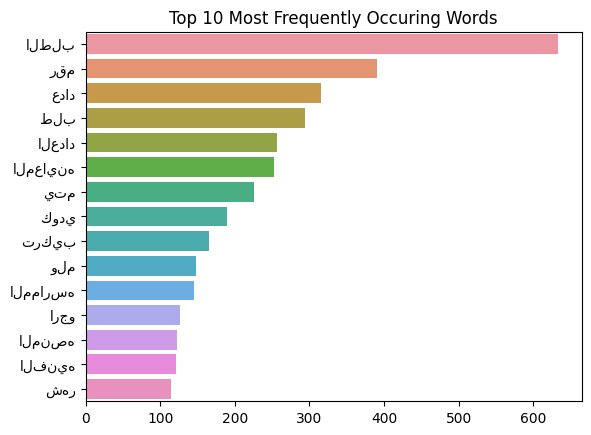

In [68]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [69]:
data.drop(['lenght','word_count'], axis = 1, inplace = True)

### Check different Lemitization Technoques

#### tashaphyne

https://github.com/MaafiHanene/Arabic-Stemmers

In [71]:
pip install tashaphyne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 4.1 MB/s eta 0:00:00


In [102]:
#make propre display for unicode
import pyarabic.arabrepr
arepr = pyarabic.arabrepr.ArabicRepr()
repr = arepr.repr

from tashaphyne.stemming import ArabicLightStemmer
ArListem = ArabicLightStemmer()
# stemming word
stem = ArListem.light_stem(word)

get_stem = []

for word in unique_words:

  print(word)
  stem = ArListem.light_stem(word)
  # extract stem
  get_stem.append(ArListem.get_stem())
  print(ArListem.get_stem())

  print("-------------")

Streaming output truncated to the last 5000 lines.
الالكترونيه
-------------
وكده
ده
-------------
والمحولات
محول
-------------
اخطارنا
خطار
-------------
وتمن
من
-------------
منا
من
-------------
تحويل
حويل
-------------
استوفيت
استوفي
-------------
عالاتنين
عالاتن
-------------
حتشتغلوا
حتشتغلو
-------------
هعرف
هعرف
-------------
يحفظكم
حفظ
-------------
لبياناتي
بيانا
-------------
فيلا
لا
-------------
تحيد
حيد
-------------
لكل
كل
-------------
دهنتها
دهن
-------------
عصام
عصام
-------------
حريصه
حريص
-------------
العقارات
عقار
-------------
ضاع
ضاع
-------------
تليفونيا
تليفوني
-------------
التيار
تيار
-------------
بالمحاسبه
محاسبه
-------------
والمعاينه
معاينه
-------------
اتلغي
اتلغ
-------------
بيقولوا
يقولوا
-------------
الموثق
موثق
-------------
لقد
قد
-------------
ونا
نا
-------------
محدش
محدش
-------------
الصفر
صفر
-------------
والسيستم
سيستم
-------------
ورقم
رقم
-------------
الناصر
ناصر
-------------
ملفات
ملف
-------------
معلق
معلق
-------------
شكوا

In [108]:
print(f"unique_words Befor stemming: {len(unique_words)}")
print(f"unique_words After stemming: {len(set(get_stem))}")

unique_words Befor stemming: 4651
unique_words After stemming: 2441


#### lemitization with nltk

In [76]:
import nltk
nltk.download('isri')

from nltk.stem.isri import ISRIStemmer
stemmed = []
stemmer = ISRIStemmer()

for word in unique_words:

  stemmed_word = stemmer.stem(word)
  stemmed.append(stemmed_word)

  print(word)
  print(stemmed_word)
  print('-----')



ويريت
وير
-----
وادخل
دخل
-----
مشاريع
مشاريع
-----
ابراهيم
راهيم
-----
بص
بص
-----
بتاعت
بتع
-----
الاخري
اخر
-----
وتركيبه
ركب
-----
للطلب
طلب
-----
اود
اود
-----
ساكن
سكن
-----
تصحيح
صحح
-----
والمرفقات
رفق
-----
المطالبه
طلب
-----
الصفحه
صفح
-----
قادر
قدر
-----
بالمخزن
خزن
-----
طنطا
طنط
-----
المدفوع
دفع
-----
اللجوء
لجء
-----
الضرر
ضرر
-----
مركبه
ركب
-----
كنت
كنت
-----
الكافيه
كفي
-----
استئناف
ئنف
-----
ايجاد
يجد
-----
الشريحه
شرح
-----
اتعمل
عمل
-----
فنطالب
طلب
-----
يقدم
قدم
-----
الاصلي
اصل
-----
احتفظ
حفظ
-----
رقمها
رقم
-----
الطوب
طوب
-----
معاينه
عان
-----
رقمي
رقم
-----
الناقصه
نقص
-----
لسهوله
سهل
-----
عنتر
عنتر
-----
مسمي
سمي
-----
دخولي
دخل
-----
والايصال
يصل
-----
بالصوره
صور
-----
والفني
فني
-----
الرئيسيه
رئس
-----
لديه
لده
-----
مشكورين
شكر
-----
اسماء
سمء
-----
الاتيه
اته
-----
بحساب
حسب
-----
بشئ
بشئ
-----
انهارده
هرد
-----
طويله
طول
-----
دلوقتي
دلق
-----
لاختي
لخت
-----
واسم
وسم
-----
اعد
اعد
-----
بحضراتكم
حضر
-----
واضافه
اضف
-----
يبعد
بعد
-----
المعني

[nltk_data] Error loading isri: Package 'isri' not found in index


Streaming output truncated to the last 5000 lines.
الكترونيه
-----
وكده
وكد
-----
والمحولات
حول
-----
اخطارنا
خطر
-----
وتمن
وتم
-----
منا
منا
-----
تحويل
حول
-----
استوفيت
وفي
-----
عالاتنين
علا
-----
حتشتغلوا
حتشتغل
-----
هعرف
هعرف
-----
يحفظكم
حفظ
-----
لبياناتي
لبياناتي
-----
فيلا
فيل
-----
تحيد
تحد
-----
لكل
لكل
-----
دهنتها
دهن
-----
عصام
عصم
-----
حريصه
حرص
-----
العقارات
عقر
-----
ضاع
ضاع
-----
تليفونيا
يفو
-----
التيار
تير
-----
بالمحاسبه
حسب
-----
والمعاينه
عان
-----
اتلغي
تلغ
-----
بيقولوا
يقل
-----
الموثق
وثق
-----
لقد
لقد
-----
ونا
ونا
-----
محدش
حدش
-----
الصفر
صفر
-----
والسيستم
سيس
-----
ورقم
رقم
-----
الناصر
نصر
-----
ملفات
ملف
-----
معلق
علق
-----
شكواي
شكا
-----
المؤياسه
ؤيس
-----
سابا
سبا
-----
لكارت
لكر
-----
عزبه
عزب
-----
تشغيل
شغل
-----
ركبت
ركب
-----
اذنكم
اذن
-----
معرفتي
عرف
-----
الايجارات
يجر
-----
بطلان
بطل
-----
وعند
عند
-----
وتقنين
وتق
-----
رفضه
رفض
-----
الشمالي
شمل
-----
سمحتوا
سمح
-----
صفحات
صفح
-----
اهو
اهو
-----
منين
نين
-----
استفسر
فسر
-----
م

#### lemmitization with qalsadi

In [77]:
!pip install qalsadi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.3/264.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.6/332.6 kB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickledb: filename=pickleDB-0.9.2-py3-none-any.whl size=4254 sha256=81ea1b611e37b1c73336c1d9b06636276e83aedce13510d58edd0d5ab8dc12b8
  Stored in directory: /root/.cache/pip/wheels/31/99/ef/8bf37f0157e6423a373297de279351af04ad18c4136c3af121
  Created wheel for codernitydb3: filename=codernitydb3-0.6.0-py3-none-any.whl size=59849

In [109]:
import qalsadi.lemmatizer
text = u"""هل تحتاج إلى ترجمة كي تفهم خطاب الملك؟ اللغة "الكلاسيكية" (الفصحى) موجودة في كل اللغات وكذلك اللغة "الدارجة" .. الفرنسية التي ندرس في المدرسة ليست الفرنسية التي يستخدمها الناس في شوارع باريس .. وملكة بريطانيا لا تخطب بلغة شوارع لندن .. لكل مقام مقال"""
lemmer = qalsadi.lemmatizer.Lemmatizer()
# lemmatize a word
lemmitized = []
for word in unique_words:
  lemmitized_word = lemmer.lemmatize(word)
  print(word)
  print(lemmitized_word)
  print('-----')
  lemmitized.append(lemmitized_word)


Exception ignored in: <function ArabicDictionary.__del__ at 0x7860f410a050>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/arramooz/arabicdictionary.py", line 109, in __del__
    self.db_connect.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 132359629910016 and this is thread id 132358745355840.


ويريت
ويريت
-----
وادخل
دخل
-----


Exception ignored in: <function ArabicDictionary.__del__ at 0x7860f410a050>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/arramooz/arabicdictionary.py", line 109, in __del__
    self.db_connect.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 132359629910016 and this is thread id 132358745355840.


Streaming output truncated to the last 5000 lines.
الالكترونيه
-----
وكده
دهي
-----
والمحولات
محول
-----
اخطارنا
اخطارنا
-----
وتمن
تمني
-----
منا
من
-----
تحويل
تحويل
-----
استوفيت
استوفى
-----
عالاتنين
عالاتنين
-----
حتشتغلوا
حتشتغلوا
-----
هعرف
هعرف
-----
يحفظكم
حفظ
-----
لبياناتي
بيان
-----
فيلا
فيل
-----
تحيد
حاد
-----
لكل
كل
-----
دهنتها
دهن
-----
عصام
عصام
-----
حريصه
حريص
-----
العقارات
عقار
-----
ضاع
ضاع
-----
تليفونيا
تليفونيا
-----
التيار
تيار
-----
بالمحاسبه
بالمحاسبه
-----
والمعاينه
والمعاينه
-----
اتلغي
اتلغي
-----
بيقولوا
بيقولوا
-----
الموثق
موثق
-----
لقد
قد
-----
ونا
ون
-----
محدش
محدش
-----
الصفر
صفر
-----
والسيستم
والسيستم
-----
ورقم
رقم
-----
الناصر
ناصر
-----
ملفات
ملف
-----
معلق
معلق
-----
شكواي
شكو
-----
المؤياسه
المؤياسه
-----
سابا
ساب
-----
لكارت
كار
-----
عزبه
عزب
-----
تشغيل
تشغيل
-----
ركبت
ركب
-----
اذنكم
اذنكم
-----
معرفتي
معرفة
-----
الايجارات
الايجارات
-----
بطلان
بطل
-----
وعند
عند
-----
وتقنين
قن
-----
رفضه
رفض
-----
الشمالي
شمال
-----
سمحتوا
سمحتوا
-

In [81]:
len(set(lemmitized))

2847

Note: tashaphyne and qalsadi CAN be Used but nltk not good

## 3) Feature Extraction




defferent Ideas for feature extraction

1. Frequency-based – Count frequency of word
*   BOW
*   Tf-idf
*   Glove(based on Matric Factorization)

2. Prediction based
*   ara2vec
*   Genism

3. libraries
*   Gensim
*   FastText
*   Flair
* Word2Vec


4. from transformer: BERT


### TF-IDF

In [136]:
tfidf = TfidfVectorizer()

In [135]:
tfidf_vectors = tfidf.fit_transform(data['cleaned'])

In [84]:
print(len(tfidf.vocabulary_) , sorted(tfidf.vocabulary_) )

4651 ['ااقدم', 'ااقوات', 'االموقع', 'اامعاينه', 'ااني', 'اباليكتروني', 'ابراهيم', 'ابطلب', 'ابعت', 'ابعته', 'ابلاغي', 'ابلغني', 'ابنتها', 'ابنتي', 'ابنه', 'ابني', 'ابوتشت', 'ابوفندي', 'ابوقير', 'ابويوسف', 'ابيس', 'اتابع', 'اتاخر', 'اتبع', 'اتبعه', 'اتته', 'اتجاه', 'اتحمل', 'اتحول', 'اتخاذ', 'اتخاذها', 'اتذكر', 'اتذكرها', 'اترفض', 'اتركب', 'اتصال', 'اتصرفت', 'اتصل', 'اتصلت', 'اتصلم', 'اتعامل', 'اتعدل', 'اتعمل', 'اتعملي', 'اتغيرت', 'اتقبل', 'اتقدم', 'اتقفلت', 'اتلغبطت', 'اتلغي', 'اتلقي', 'اتم', 'اتمام', 'اتمكن', 'اتمني', 'اتواصل', 'اتواصلو', 'اتوافق', 'اتوجه', 'اتوقف', 'اثبات', 'اثر', 'اثناء', 'اجابتكم', 'اجابه', 'اجازه', 'اجتاز', 'اجد', 'اجراء', 'اجراءات', 'اجرائها', 'اجمالي', 'اجمعهم', 'اجهزه', 'اجي', 'اجيب', 'احاول', 'احب', 'احتاج', 'احترام', 'احتفظ', 'احتمال', 'احدث', 'احدهما', 'احذف', 'احذفهم', 'احسن', 'احصل', 'احضار', 'احضاره', 'احط', 'احطار', 'احل', 'احلاله', 'احمد', 'احمدارجو', 'احنا', 'احول', 'اخباري', 'اخبرته', 'اخبرني', 'اخبرونا', 'اختار', 'اختارت', 'اختلاف', 'اختي', 'اختيار',

***VIP NOTE: I should make lemitization***

In [85]:
tfidf_vectors.toarray()[0][:500]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [86]:
tfidf_vectors.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

*** NOTE: VERY SPARSE !!!***

## 4) Dimention Reduction

More Different Techniques [HERE](https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/)

### SVD

In [87]:
from sklearn.decomposition import TruncatedSVD

In [88]:
svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(tfidf_vectors.toarray())
print(len(svd) ,"×", len(svd[0]))
#1000 × 2

1000 × 2


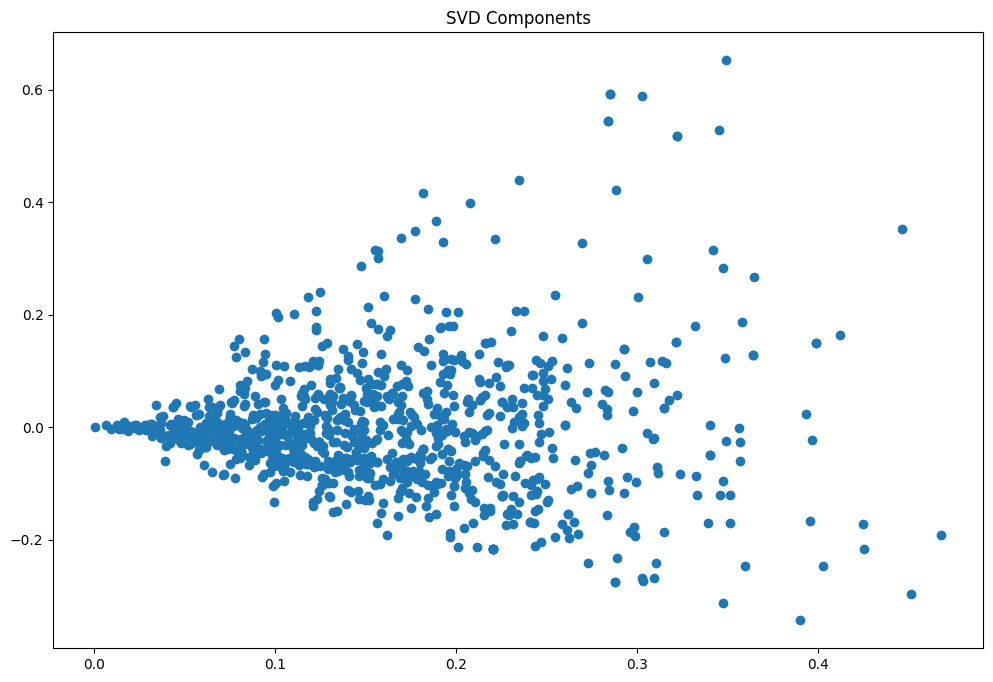

In [89]:
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])

## 5) Clustering

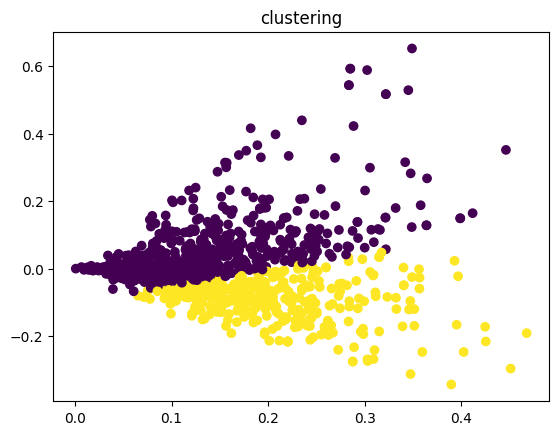

In [90]:
fig, axs = plt.subplots()

y_pred = KMeans(n_clusters=2, n_init = "auto", random_state = 10).fit_predict(svd)
axs.scatter(svd[:, 0], svd[:, 1], c = y_pred)
axs.set_title("clustering")
plt.show()


In [91]:
output = pd.DataFrame(data['cleaned'])
output['y_svd'] = y_pred

Check output classes

In [ ]:
output[output['y_svd'] == 0]

In [ ]:
output[output['y_svd'] == 1]

# Templete

In [30]:
def data_EDA(data):
  print("Shape of data=>",data.shape)
  print('-----------')

  print(f"Check non -> /n {data.isnull().sum()}")
  print('-----------')

  print("CHECK duplicated-> " , data["comment"].duplicated().sum())
  print('-----------')

  data['lenght'] = data['comment'].str.len()
  print('Length of a sample comment:', data['lenght'].min())
  print('Length of a sample comment:', data['lenght'].max())
  print('Length of a sample comment:', data['lenght'].mean())
  print('-----------')

  data['word_count'] = [len(i.split()) for i in data['comment']]
  print('word_count of a sample comment:', data['word_count'].min())
  print('word_count of a sample comment:', data['word_count'].max())
  print('word_count of a sample comment:', data['word_count'].mean())



In [31]:
def remove_diacritics(text):
    return araby.strip_diacritics(text)

def replace_underscore(text):
  #Replace @username with empty string
    return re.sub('_', ' ', text)

def replace_username(text):
  #Replace @username with empty string
    return re.sub('@[^\s]+', ' ', text)

def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))

def remove_non_ascii(text): #remove english and emoji
    """Remove non-ASCII characters from list of tokenized words"""
    cleaned_text = re.sub(r'[^\u0600-\u06FF\s]', ' ', text)
    return cleaned_text
#keep EN    cleaned_text = re.sub(r'[^\x00-\x7F\u0600-\u06FF\s]', '', text)
#EN    return unicodedata.normalize('NFKD', text).encode('latin-1', 'ignore').decode('latin-1', 'ignore')

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = english_punctuations + arabic_punctuations
def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', ' ', text)

def remove_whitespaces(text):
    pattern = r'\s+'  # Matches one or more whitespace characters
    text = re.sub(pattern, ' ', text)
    return text.strip()

def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

def remove_repeated_characters(text):
    pattern = r'(\w)\1{2,}'  # Matches any character repeated more than 2 times
    replaced_text = re.sub(pattern, r'\1', text)
    return replaced_text

def remove_single_characters(text):
  return ' '.join( [w for w in text.split() if len(w)>1] )

stopwords_list = stopwords.words('arabic')
#يجب ان احذف التشكيل واعمل نورماليز لل stopwords
stopwords_Str = ' '.join([str(elem) for elem in stopwords_list])
AR_stopwords = remove_diacritics(stopwords_Str)
AR_stopwords = normalize_arabic(AR_stopwords)
def remove_stopWords(text):
    return ' '.join([word for word in text.split() if word not in AR_stopwords]) #add another



In [ ]:

def Arabic_preprocess(text):
  text = replace_underscore(text)
  text = replace_username(text)
  text = replace_numbers(text)

  text = remove_non_ascii(text)
  text = remove_special_chars(text)

  text = remove_punctuation(text)
  text = normalize_arabic(text)
  text = remove_diacritics(text)
  text = remove_stopWords(text)

  text = remove_single_characters(text)
  text = remove_repeated_characters(text)
  text = remove_whitespaces(text)

  return text

In [131]:
def count(corpus):
  corpus['splited_sentance'] = corpus['cleaned'].str.split()
  corpus = [word for splited_sentance in  corpus['splited_sentance'] for word in splited_sentance]
  unique_words = set(corpus)
  print(f"corpus unique vocab: {len(unique_words)}")
  mostCommon = Counter(corpus).most_common(30)
  print(f"most_Common vocab:{mostCommon}")
  return mostCommon

def plot_words(mostCommon):
  words = []
  freq = []
  for word, count in mostCommon[:10]:
      words.append(word)
      freq.append(count)
  sns.barplot(x=freq, y=words)
  plt.title('Top 10 Most Frequently Occuring Words')
  plt.show()

In [33]:
def Data_Prerocess(corpus):
  corpus['cleaned'] = corpus['comment'].apply(lambda x: Arabic_preprocess(x))
  mostCommon = count(corpus)
  plot_words(mostCommon)


In [137]:
def tfidf(corpus):
  tfidf = TfidfVectorizer()
  tfidf_vectors = tfidf.fit_transform(corpus['cleaned'])
  print(len(tfidf.vocabulary_) , sorted(tfidf.vocabulary_) )
  print(tfidf_vectors.toarray()[0][:10])
  return tfidf_vectors.toarray()

In [35]:
def dim_SVD(features):
  svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(features)
  print("shape of svd", len(svd) ,"×", len(svd[0]))
  plt.figure(figsize=(8,8))
  plt.title('SVD Components')
  plt.scatter(svd[:,0], svd[:,1])
  return svd
  #1000 × 2


In [36]:
def cluster_KMeans(svd):
  fig, axs = plt.subplots()
  y_pred = KMeans(n_clusters=2, n_init = "auto", random_state = 10).fit_predict(svd)
  axs.scatter(svd[:, 0], svd[:, 1], c = y_pred)
  axs.set_title("clustering")
  plt.show()
  return y_pred


In [37]:
def generate_output(corpus, y_pred):
  output = pd.DataFrame(corpus['cleaned'])
  output['label'] = corpus['label']
  output['y_svd'] = y_pred
  return output

# comparison Using Labeled DS

# Data Revew for Hotels

In [120]:
data_ATT = pd.read_csv('/content/drive/MyDrive/NTI_datasets/text/ATT.csv', header=None)
data_ATT.drop([0], axis = 1, inplace= True)
data_ATT.rename(columns={1:'comment', 2:'label'}, inplace=True)
data_ATT.drop([0], inplace= True)
data_ATT.head()

,comment,label
1,حمام الكبريت \r\nنصحوني بتجربة حمام الكبريت. ي...,1.0
2,قلعة ساحرة \r\nمنظر خلاب للمدينة من أعلى القلع...,1.0
3,تبليسي \r\nتبليسي جورجيا\r\nمن أجمل المدن التي...,1.0
4,جولة على المدينة القديمة تبليسي < شاردن \r\nمم...,1.0
5,احلي اجازه لمحبي الطبيعه \r\nالمناظر الخلابه ا...,1.0


Shape of data=> (2154, 2)
-----------
Check non -> /n comment    0
label      0
dtype: int64
-----------
CHECK duplicated->  0
-----------
Length of a sample comment: 60
Length of a sample comment: 3382
Length of a sample comment: 230.3217270194986
-----------
word_count of a sample comment: 2
word_count of a sample comment: 598
word_count of a sample comment: 39.84076137418756


<Axes: xlabel='word_count', ylabel='Count'>

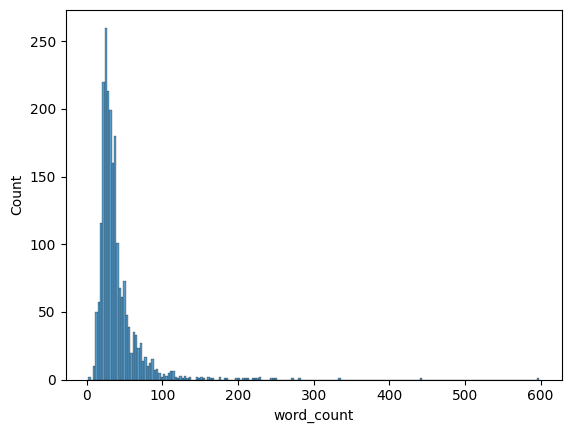

In [121]:
data_EDA(data_ATT)
sns.histplot(data=data_ATT['word_count'])

In [129]:
data_ATT.drop(['lenght', 'word_count'], axis=1, inplace = True)

In [130]:
data_ATT.head()

,comment,label,cleaned
1,حمام الكبريت \r\nنصحوني بتجربة حمام الكبريت. ي...,1.0,حمام الكبريت نصحوني بتجربه حمام الكبريت يمكنكم...
2,قلعة ساحرة \r\nمنظر خلاب للمدينة من أعلى القلع...,1.0,قلعه ساحره منظر خلاب للمدينه اعلي القلعه يوجد ...
3,تبليسي \r\nتبليسي جورجيا\r\nمن أجمل المدن التي...,1.0,تبليسي تبليسي جورجيا اجمل المدن زرتها حياتي شع...
4,جولة على المدينة القديمة تبليسي < شاردن \r\nمم...,1.0,جوله المدينه القديمه تبليسي شاردن ممتعه الجوله...
5,احلي اجازه لمحبي الطبيعه \r\nالمناظر الخلابه ا...,1.0,احلي اجازه لمحبي الطبيعه المناظر الخلابه الطبي...


corpus unique vocab: 17238
most_Common vocab:[('جدا', 758), ('رائع', 550), ('جميل', 429), ('رائعه', 372), ('المكان', 372), ('جميله', 336), ('يوجد', 241), ('اجمل', 215), ('مدينه', 210), ('انصح', 203), ('الزياره', 186), ('زياره', 167), ('كانت', 155), ('الله', 154), ('المدينه', 148), ('حديقه', 145), ('منطقه', 145), ('افضل', 140), ('الاماكن', 126), ('يستحق', 126), ('الحديقه', 126), ('المطاعم', 125), ('تجربه', 121), ('المسجد', 118), ('المتحف', 117), ('العالم', 117), ('روعه', 116), ('وقت', 116), ('رحله', 115), ('الجميله', 113)]


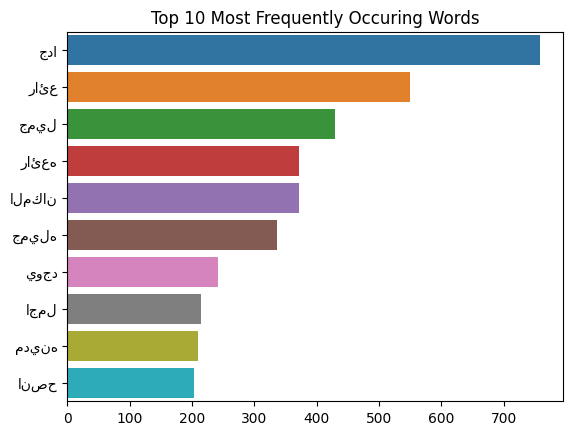

In [132]:
Data_Prerocess(data_ATT)

In [115]:
data_ATT.head()

,comment,label,lenght,word_count,cleaned
1,حمام الكبريت \r\nنصحوني بتجربة حمام الكبريت. ي...,1.0,283,45,حمام الكبريت نصحوني بتجربه حمام الكبريت يمكنكم...
2,قلعة ساحرة \r\nمنظر خلاب للمدينة من أعلى القلع...,1.0,130,22,قلعه ساحره منظر خلاب للمدينه اعلي القلعه يوجد ...
3,تبليسي \r\nتبليسي جورجيا\r\nمن أجمل المدن التي...,1.0,136,24,تبليسي تبليسي جورجيا اجمل المدن زرتها حياتي شع...
4,جولة على المدينة القديمة تبليسي < شاردن \r\nمم...,1.0,203,30,جوله المدينه القديمه تبليسي شاردن ممتعه الجوله...
5,احلي اجازه لمحبي الطبيعه \r\nالمناظر الخلابه ا...,1.0,134,22,احلي اجازه لمحبي الطبيعه المناظر الخلابه الطبي...


17235 ['ءنسي', 'ءه', 'ئعين', 'اؤروع', 'ااخر', 'االشهي', 'االفجر', 'االلي', 'االمشروبات', 'االنبوي', 'االهرامات', 'ابا', 'اباد', 'ابالاضافه', 'ابان', 'ابتداء', 'ابتداءا', 'ابتسامات', 'ابتسامه', 'ابحاث', 'ابحث', 'ابدئو', 'ابدا', 'ابداع', 'ابداعات', 'ابدالاتؤخذ', 'ابدعت', 'ابدله', 'ابراج', 'ابرام', 'ابراهيم', 'ابرد', 'ابرز', 'ابرزها', 'ابرهه', 'ابسامه', 'ابعد', 'ابعدو', 'ابقار', 'ابل', 'ابن', 'ابناء', 'ابناءك', 'ابنائي', 'ابنتي', 'ابنه', 'ابني', 'ابنيته', 'ابنيما', 'ابنيه', 'ابهار', 'ابهجت', 'ابهر', 'ابهرتني', 'ابهرني', 'ابهي', 'ابواب', 'ابوابها', 'ابوالهول', 'ابوبكر', 'ابوبكرالصديق', 'ابوبكروعمر', 'ابوظبي', 'ابومعن', 'ابوها', 'ابي', 'ابيض', 'ابيل', 'ابيه', 'اتامل', 'اتباع', 'اتت', 'اتجاه', 'اتجهنا', 'اتجول', 'اتخيل', 'اتذكر', 'اتذكرها', 'اتردد', 'اترك', 'اتساءل', 'اتساخ', 'اتساع', 'اتسال', 'اتسلق', 'اتشرف', 'اتصال', 'اتصل', 'اتصلوا', 'اتصور', 'اتضح', 'اتعرف', 'اتعلم', 'اتكلم', 'اتلانتس', 'اتمامه', 'اتمكن', 'اتمنا', 'اتمني', 'اتمنی', 'اتموا', 'اتنين', 'اتوبيس', 'اتوجه', 'اتوق', 'اتوقع', '

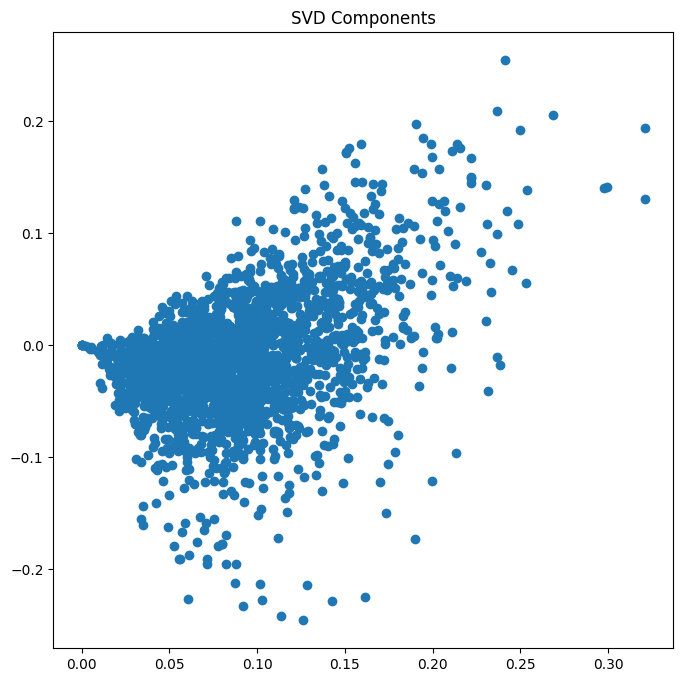

In [138]:
features = tfidf(data_ATT)
reduction = dim_SVD(features)


In [117]:
print(len(reduction), "*", len(reduction[0]))

2154 * 2


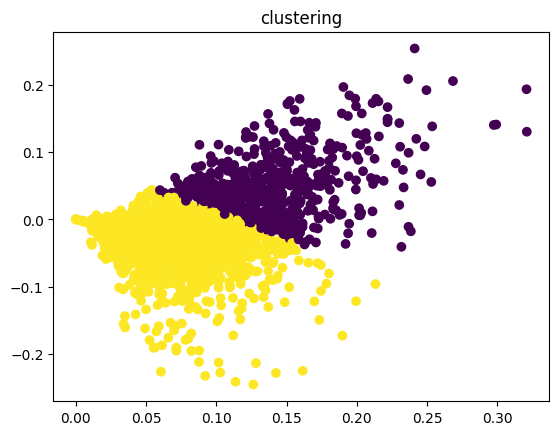

In [118]:
y_pred = pd.DataFrame(cluster_KMeans(reduction))

In [144]:
output = generate_output(data_ATT, y_pred)
output.head()

,cleaned,label,y_svd
1,حمام الكبريت نصحوني بتجربه حمام الكبريت يمكنكم...,1.0,0.0
2,قلعه ساحره منظر خلاب للمدينه اعلي القلعه يوجد ...,1.0,1.0
3,تبليسي تبليسي جورجيا اجمل المدن زرتها حياتي شع...,1.0,1.0
4,جوله المدينه القديمه تبليسي شاردن ممتعه الجوله...,1.0,1.0
5,احلي اجازه لمحبي الطبيعه المناظر الخلابه الطبي...,1.0,1.0


In [145]:
output.dropna()

,cleaned,label,y_svd
1,حمام الكبريت نصحوني بتجربه حمام الكبريت يمكنكم...,1.0,0.0
2,قلعه ساحره منظر خلاب للمدينه اعلي القلعه يوجد ...,1.0,1.0
3,تبليسي تبليسي جورجيا اجمل المدن زرتها حياتي شع...,1.0,1.0
4,جوله المدينه القديمه تبليسي شاردن ممتعه الجوله...,1.0,1.0
5,احلي اجازه لمحبي الطبيعه المناظر الخلابه الطبي...,1.0,1.0
...,...,...,...
2149,اجمل ممكن تتخيله المواقع لايمكن تتخيل مدي جمال...,1.0,1.0
2150,لمحبي الطبيعه يمتاز الجبل الاخضر بطبيعته المتن...,1.0,1.0
2151,سحر الطبيعه الجبل الاخضر شرق العاصمه الليبيه ط...,1.0,1.0
2152,طرابلس المختار بالناس وهم يمرحون يتفرجون التحف...,-1.0,1.0


In [146]:
output['label'] = output['label'].astype('float')

In [153]:
#Named Class convention
output[output['label'] == -1.0] = 0

In [154]:
import numpy as np
np.mean(output['label'] == output['y_svd'])

0.7279480037140205